In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from trajectory import * 
from trajectory.segments import same_sign, ValidationError, SegmentList
from trajectory.plot import * 

0.1 0 159
0.1 159 0
0.10000000000000003 0 -2332
0.09999999999999998 -2332 -3532
0.09999999999999998 -3532 -4677
0.09999999999999998 -4677 -5748
0.09999999999999998 -5748 -6728
0.09999999999999998 -6728 -7602
0.09999999999999998 -7602 -8356
0.09999999999999998 -8356 -8979
0.09999999999999998 -8979 -9460
0.10000000000000009 -9460 -9791
0.10000000000000009 -9791 -9968
0.10000000000000009 -9968 -9989
0.10000000000000009 -9989 -9851
0.10000000000000009 -9851 -9558
0.10000000000000009 -9558 -9114
0.10000000000000009 -9114 -8527
0.10000000000000009 -8527 -7805
0.09999999999999987 -7805 -6960
0.10000000000000009 -6960 -6005
0.10000000000000009 -6005 -4956
0.10000000000000009 -4956 -3828
0.10000000000000009 -3828 -2640
0.10000000000000009 -2640 -1411
0.10000000000000009 -1411 -159
0.10000000000000009 -159 0
0.10000000000000009 0 2332
0.10000000000000009 2332 3532
0.10000000000000009 3532 4677
0.10000000000000009 4677 5748
0.10000000000000009 5748 6728
0.10000000000000009 6728 7602
0.10000000000

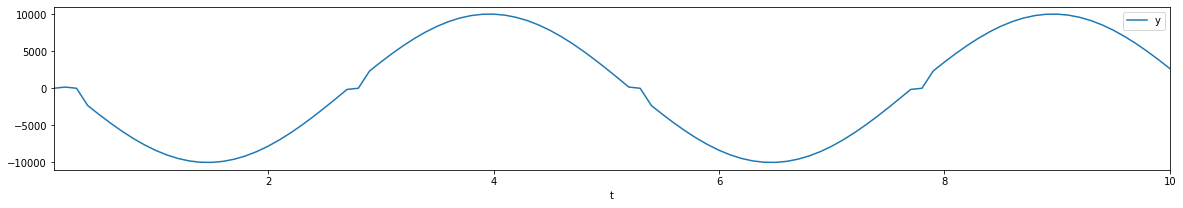

In [78]:
def generate_signal():
    
    t = 0
    while True:
        v = np.sin(2*np.pi*t/5+3)
    
        t_d = yield t, v
        
        t+=t_d

def sign(x):
    if x == 0:
        return 0
    elif x > 0:
        return 1
    else:
        return -1
    
def same_sign(a, b):
    return int(a) == 0 or int(b) == 0 or sign(a) == sign(b)

t_delta = .1

def generate_moves(max_vel):
    
    signal = generate_signal()
    signal.send(None)
    
    v_last = 0
    t_last = 0
    
    while True:
        t, v = signal.send(t_delta)
    
        v = v * max_vel

        if not same_sign(v, v_last):
            v = 0

        yield t, t-t_last, v_last, v
            
        v_last = v
        t_last = t
        

d = []
    
for t, t_d, v0, v1 in generate_moves(10000):
        
    if t > 10:
        break

    print(t_d, int(v0), int(v1))
        
    d.append({'t':t, 'y':v0}) 
    

df = pd.DataFrame(d)
df.plot(x='t', y='y',figsize=(20,3))
    